In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rcParams
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyo
import plotly.graph_objects as go


In [3]:
path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data_position.xlsx"

df = pd.read_excel(path_file, sheet_name='yaw0pitch0roll0')

# print(df1)

In [4]:
x_calculated = df.loc[:, 'x1']
y_calculated = df.loc[:, 'y1']
z_calculated = df.loc[:, 'z1']
x_samples = df.loc[:, 'X1']
y_samples = df.loc[:, 'Y1']
z_samples = df.loc[:, 'Z1']
# print(z_calculated)


delta_x = df.loc[:, 'delta_x1']
delta_y = df.loc[:, 'delta_y1']
delta_z = df.loc[:, 'delta_z1']


delta_xy = df.loc[:, 'delta_xy1']
delta_xyz = df.loc[:, 'delta_xyz1']



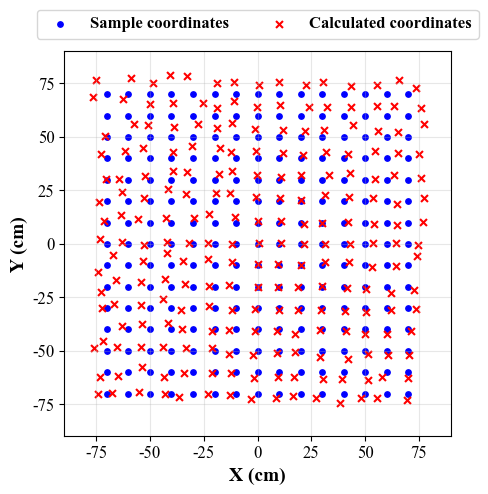

In [37]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# plt.rcParams['font.weight'] = 'bold'
rcParams['font.family'] = 'Times New Roman'
# Define font properties for Times New Roman
legend_font = font_manager.FontProperties( style='normal', weight='bold', size=5)
label_font = {'style': 'normal', 'weight': 'bold', 'size': 10}
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.scatter(x_samples, y_samples, c='b', marker='o',s=15, label='Sample coordinates', alpha =1)
ax.scatter(x_calculated, y_calculated, c= 'r', marker='x',s=25, label='Calculated coordinates', alpha = 1)

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize=14)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize=14)
ax.legend(loc='upper center', fontsize=12,  bbox_to_anchor=(0.5, 1.13), ncol=2)

ax.set_xticks([-75, -50, -25, 0, 25, 50, 75])
ax.set_yticks([-75, -50, -25, 0, 25, 50, 75])

ax.set_xticklabels(['-75', '-50', '-25', '0', '25', '50', '75'], fontsize=12, weight='normal')  # Change to normal case
ax.set_yticklabels(['-75', '-50', '-25', '0', '25', '50', '75'], fontsize=12, weight='normal')  # Change to normal case

ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', labelsize=12, pad = 3)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=12, pad = 3)  # Kích thước chữ cho trục Y

# Set axis limits to match the example
ax.set_xlim(-90, 90)
ax.set_ylim(-90, 90)
plt.savefig('img/c1_2D', dpi = 400, bbox_inches='tight') 

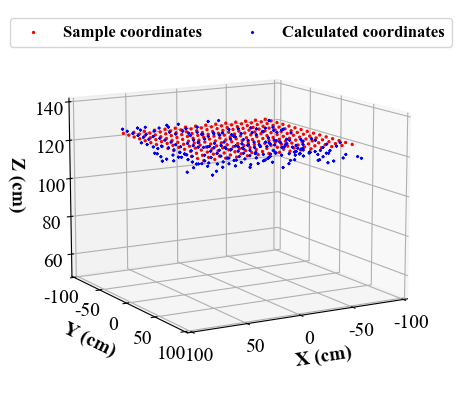

In [67]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# plt.rcParams['font.weight'] = 'bold'

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, c='r', marker='o', s= 2, label = 'Sample coordinates', alpha = 1)
ax.scatter(x_calculated, y_calculated, z_calculated, c='b', marker='x', s=2, label = 'Calculated coordinates', alpha = 1)

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize = 14, labelpad=3)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize = 14, labelpad=3)
ax.set_zlabel('Z (cm)', fontdict={'weight': 'bold'}, fontsize = 14, labelpad=3)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(50, 140)
ax.grid(True)
ax.legend(loc='upper center', fontsize=12,  bbox_to_anchor=(0.5, 1), ncol=3)

# Adjust view angle
ax.view_init(elev=12, azim=60)

ax.set_xticks([-100, -50, 0, 50, 100])
ax.set_yticks([-100, -50, 0, 50, 100])
ax.set_zticks([ 60, 80, 100, 120, 140])

ax.set_xticklabels(['-100', '-50', '0', '50', '100'], fontsize=10, weight='normal')  # Change to normal case
ax.set_yticklabels(['-100', '-50', '0', '50', '100'], fontsize=10, weight='normal')  # Change to normal case
ax.set_zticklabels(['60', '80', '100', '120', '140'], fontsize=10, weight='normal')  # Change to normal case

ax.tick_params(axis='x', labelsize=14, pad = 0.5)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=14, pad = 0.5)  # Kích thước chữ cho trục Y
ax.tick_params(axis='z', labelsize=14, pad = 0.5)  # Kích thước chữ cho trục Z

# Remove top and right spines
# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
plt.show()
fig.savefig('img/c1_3D', dpi = 300, bbox_inches='tight') 

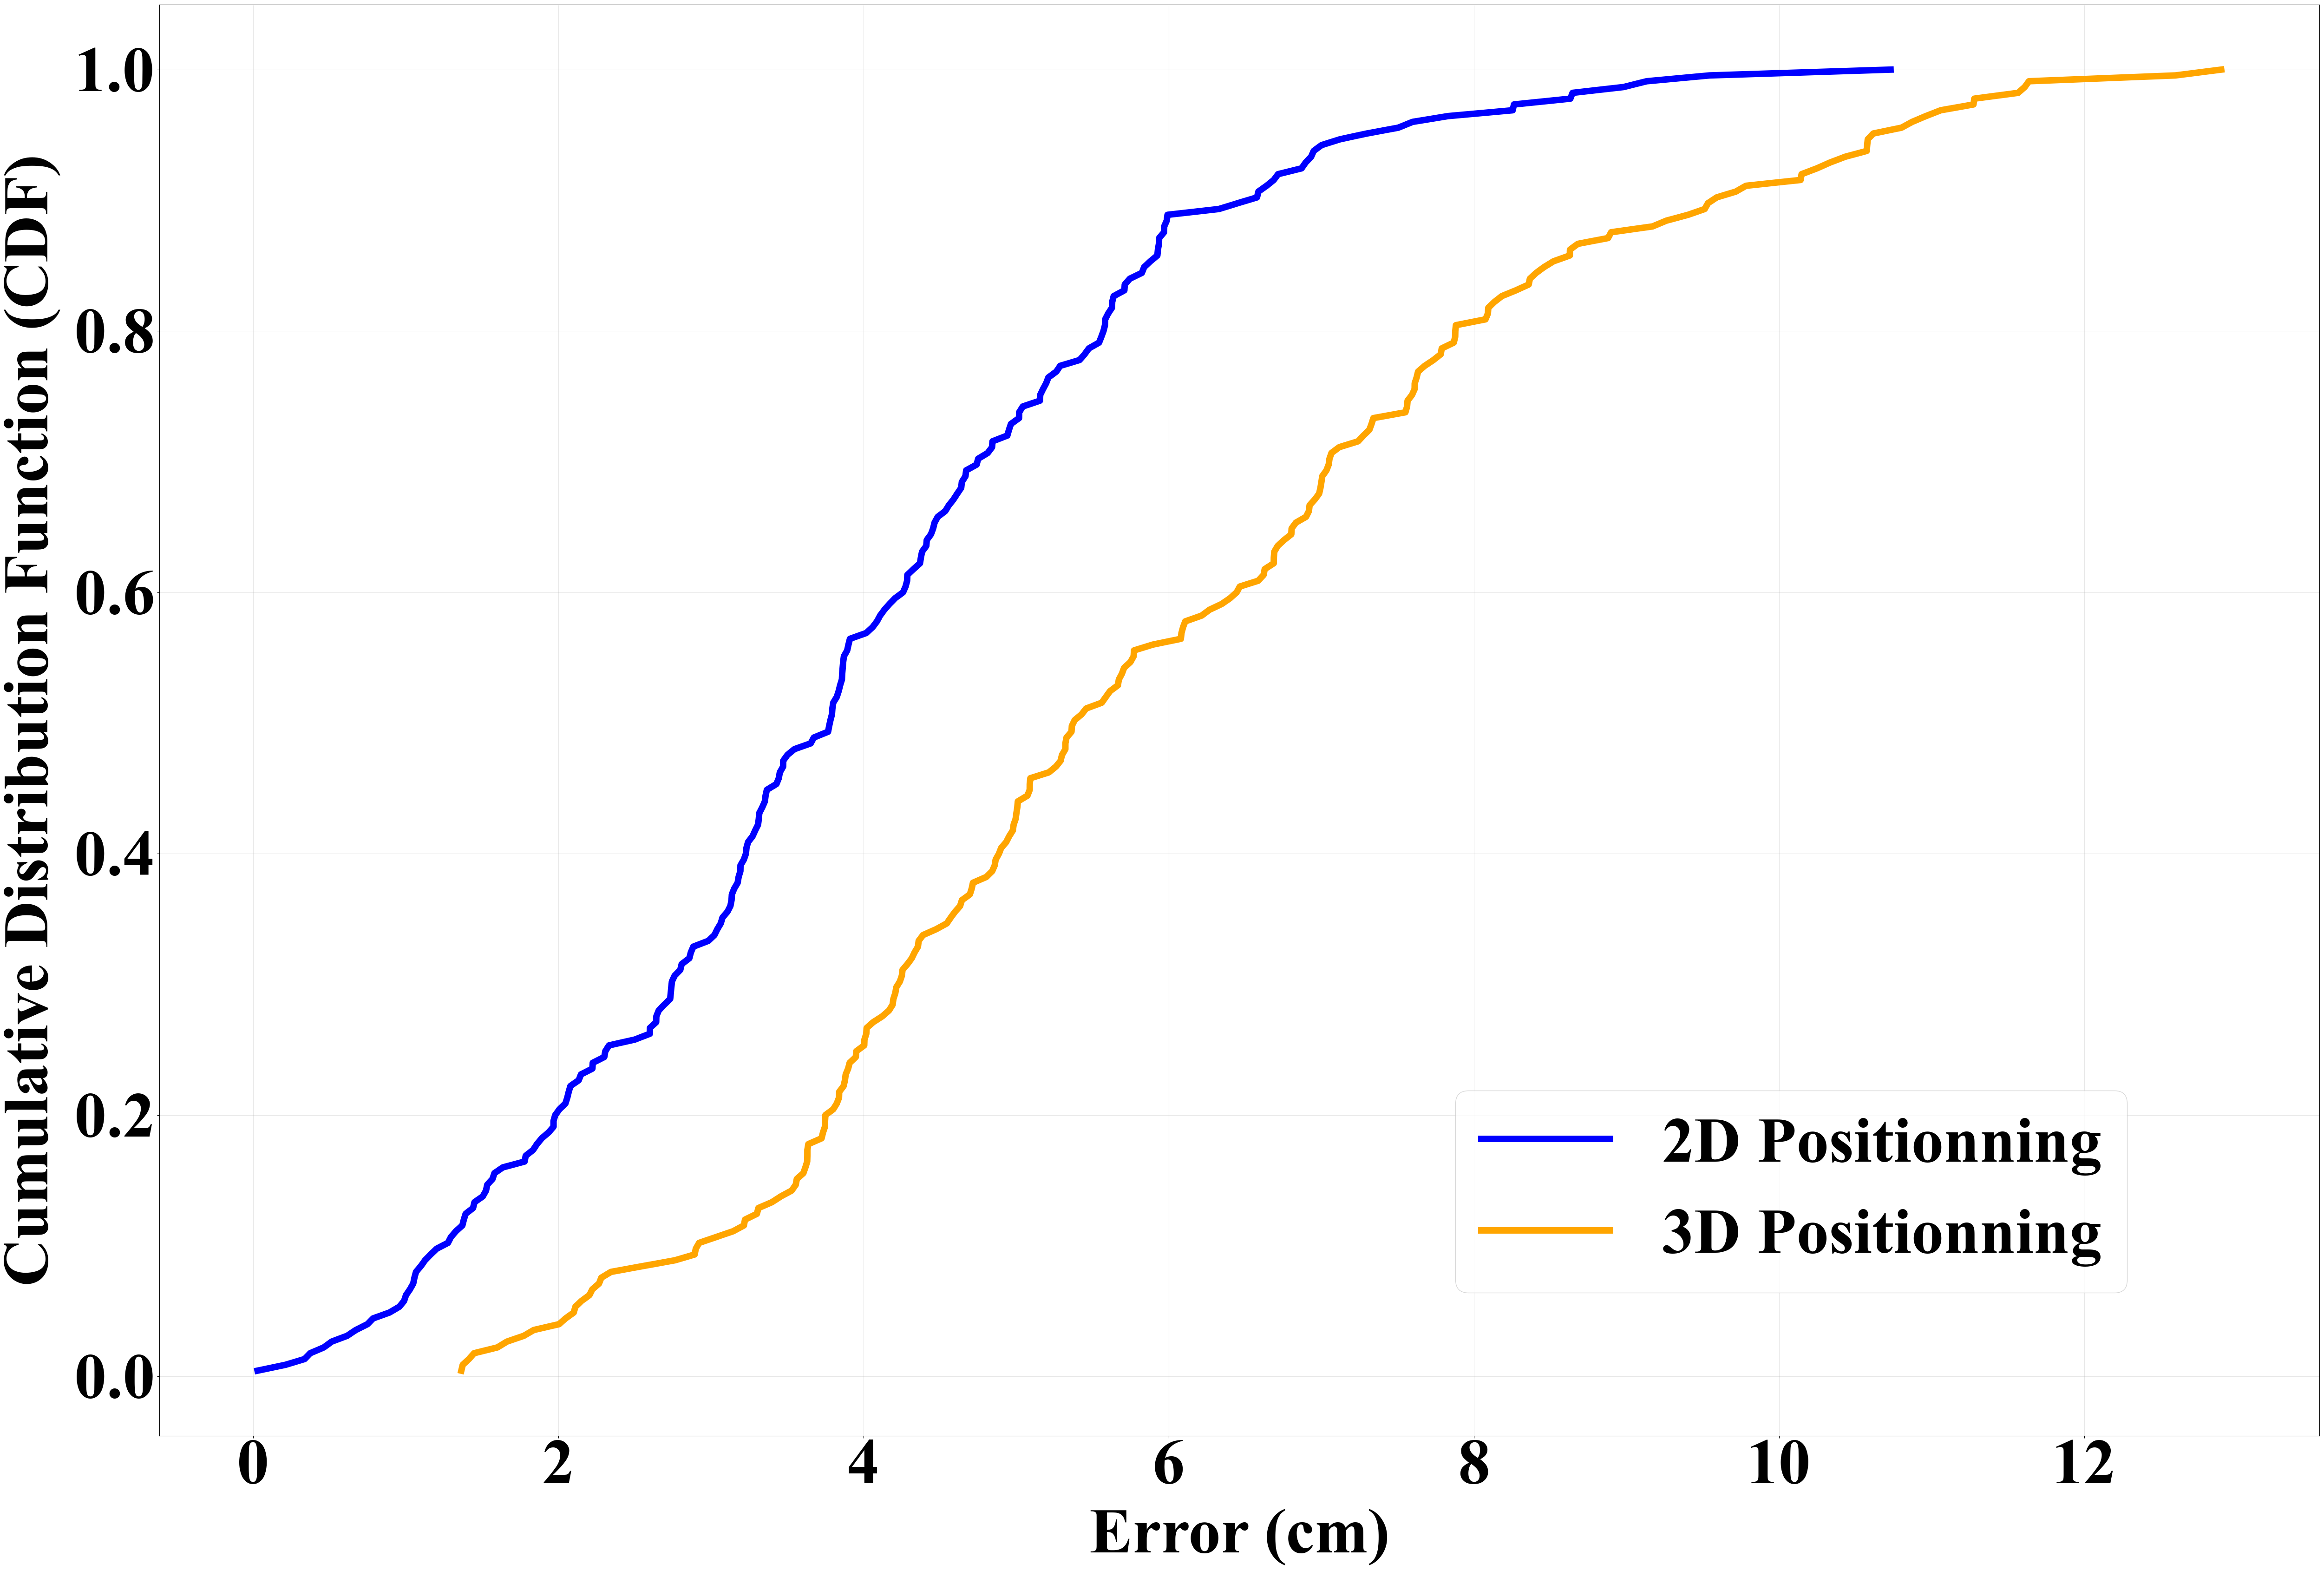

In [29]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# print(delta_xy)
data_sorted = np.sort(delta_xy)
data_xyz_sorted = np.sort(delta_xyz)


# print(data_sorted)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
cdf2 = np.arange(1, len(data_xyz_sorted) + 1) / len(data_xyz_sorted)


# Vẽ biểu đồ CDF
plt.figure(figsize=(60, 40))
ax = plt.gca()


# Vẽ CDF
ax.plot(data_sorted, cdf, linestyle='-', color='blue', linewidth = 10, label = '2D Positionning')

ax.plot(data_xyz_sorted, cdf2, linestyle='-', color='orange', linewidth = 10, label = '3D Positionning')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Error (cm)', fontdict={'weight': 'bold'}, fontsize = 100, labelpad=20)
ax.set_ylabel('Cumulative Distribution Function (CDF)', fontdict={'weight': 'bold'}, fontsize = 100, labelpad=20)

ax.legend(loc = (0.6, 0.1), fontsize = 100)
# Hiển thị lưới
ax.grid(True, alpha=0.3)


ax.tick_params(axis='x', labelsize=100)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=100)  # Kích thước chữ cho trục Y

plt.savefig('img/c1_CDF',dpi = 400,bbox_inches='tight')


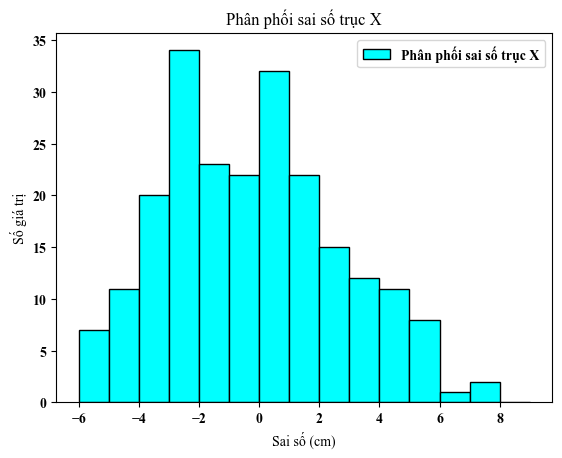

In [30]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(-6, 10, 1)

# Vẽ biểu đồ cột
plt.hist(delta_x, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục X')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục X')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

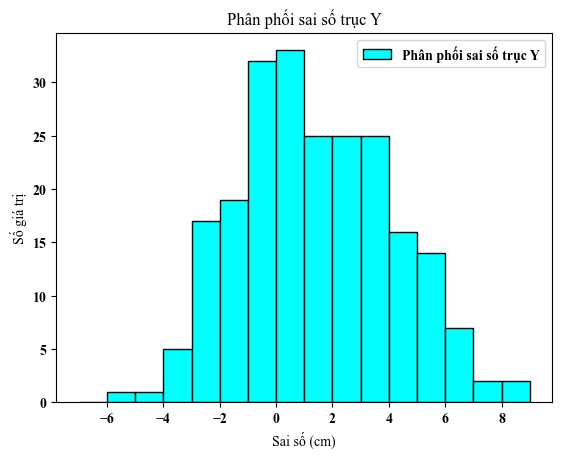

In [31]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(-7, 10, 1)

# Vẽ biểu đồ cột
plt.hist(delta_y, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục Y')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục Y')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

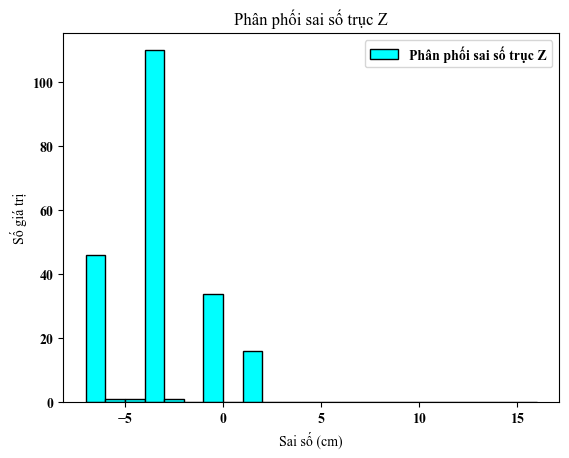

In [32]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(-7, 17, 1)

# Vẽ biểu đồ cột
plt.hist(delta_z, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục Z')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục Z')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

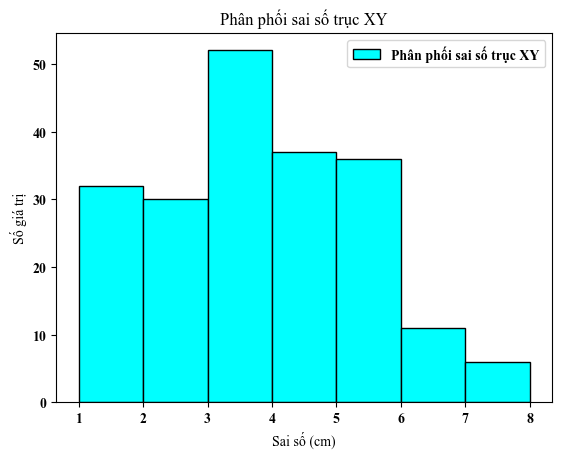

In [33]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(1, 9, 1)

# Vẽ biểu đồ cột
plt.hist(delta_xy, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục XY')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục XY')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

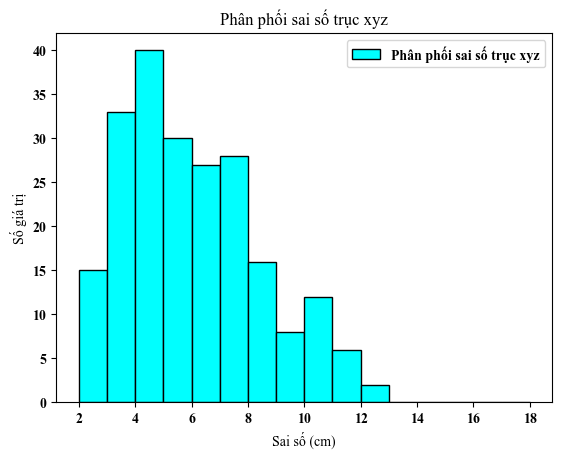

In [34]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(2, 19, 1)

# Vẽ biểu đồ cột
plt.hist(delta_xyz, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục xyz')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục xyz')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()